In [120]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline
dataset = pd.read_csv('childhood_obesity_newest.csv')
dataset

,case_diff,pop_diff,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,-52,-10371,10.2036,10.4631,10.1266,11.0974,10.1266,9.4727
1,-25,-23096,10.2400,10.1659,9.4727,10.4913,9.5468,8.2940
2,-18,-6261,10.7144,10.6454,10.0432,11.3145,9.9988,8.8537
3,-4,-3271,9.3927,9.1050,8.6995,9.9035,7.6009,6.9078
4,-2,4589,9.7410,8.5172,8.9872,9.5468,8.5172,7.6009
5,2,-7468,9.6158,9.6158,9.6803,10.2036,9.6158,9.9988
6,6,-8680,10.4043,10.3090,9.2103,9.9988,8.6995,9.1050
7,17,5806,10.9682,11.1124,9.6158,10.5453,10.3417,9.9523
8,17,-54308,10.6690,10.3090,9.7410,10.9853,10.3735,9.8522
9,18,6948,10.3735,10.3735,9.6158,9.6803,9.6803,9.2103


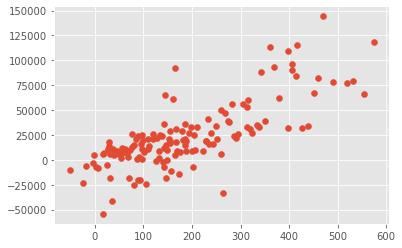

In [139]:
plt.scatter(dataset['case_diff'],dataset['pop_diff'])

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    
    while True:
        
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        
        vif_df = vif_df.drop('const')
        

        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [141]:
dataset.columns

Index(['case_diff', 'pop_diff', 'clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling'],
      dtype='object')

In [142]:
df_predictors_selected_VIF = drop_column_using_vif_(dataset.drop('case_diff', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['pop_diff', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [143]:
multi_regression_model_1 = smf.ols(formula='case_diff ~ pop_diff+clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling',data=dataset).fit()

print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              case_diff   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     47.52
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.19e-33
Time:                        04:44:30   Log-Likelihood:                -829.10
No. Observations:                 145   AIC:                             1674.
Df Residuals:                     137   BIC:                             1698.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -887.5027    153.665  

In [144]:
multi_regression_model_2 = smf.ols(formula='case_diff ~ pop_diff+ clean_environ + health_training + school_awareness + media_awareness + sub_counselling',data=dataset).fit()

print(multi_regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              case_diff   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     54.27
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           6.01e-34
Time:                        04:44:31   Log-Likelihood:                -830.56
No. Observations:                 145   AIC:                             1675.
Df Residuals:                     138   BIC:                             1696.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -810.5094    147.544  

In [145]:
# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_3 = smf.ols(formula='case_diff ~ pop_diff + clean_environ + health_training + media_awareness + sub_counselling',data=dataset).fit()

# And this gives a big summary of the results:
print(multi_regression_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              case_diff   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     65.42
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           8.00e-35
Time:                        04:44:31   Log-Likelihood:                -830.70
No. Observations:                 145   AIC:                             1673.
Df Residuals:                     139   BIC:                             1691.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -841.1783    134.355     

In [146]:
multi_regression_model_4 = smf.ols(formula='case_diff ~ pop_diff+ clean_environ + media_awareness + sub_counselling ',data=dataset).fit()

print(multi_regression_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              case_diff   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     81.18
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.67e-35
Time:                        04:44:32   Log-Likelihood:                -831.44
No. Observations:                 145   AIC:                             1673.
Df Residuals:                     140   BIC:                             1688.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -779.8178    124.260     

In [147]:
multi_regression_model_5 = smf.ols(formula='case_diff ~ pop_diff + clean_environ + media_awareness ',data=dataset).fit()

print(multi_regression_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:              case_diff   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           6.00e-36
Time:                        04:44:32   Log-Likelihood:                -832.89
No. Observations:                 145   AIC:                             1674.
Df Residuals:                     141   BIC:                             1686.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -721.7386    120.146     

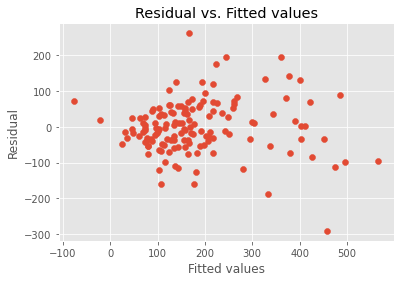

In [148]:
plt.scatter(multi_regression_model_4.fittedvalues, multi_regression_model_4.resid)
# adding title and labels
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted values')
plt.show()